# Homework 3 
### PSTAT 131

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Titanic_Survival_Prediction_/main/titanic.jpg" alt="Titanic" width="70%" style="display: block; margin: auto;" />


## Binary Classification

For this assignment, we will be working with part of a Kaggle data set that was the subject of a machine learning competition and is often used for practicing ML models. The goal is classification; specifically, to predict which passengers would survive the Titanic shipwreck.

Load the data from data/titanic.csv into Python and familiarize yourself with the variables it contains using the codebook (data/titanic_codebook.txt).

Notice that survived and pclass should be changed to factors. When changing survived to a factor, you may want to reorder the factor so that “Yes” is the first level.

Remember that you’ll need to set a seed at the beginning of the document to reproduce your results.

In [417]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


data = pd.read_csv("data/titanic.csv")
data

,passenger_id,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,No,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,Yes,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,No,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,Yes,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Question 1
Split the data, stratifying on the outcome variable, survived. You should choose the proportions to split the data into. Verify that the training and testing data sets have the appropriate number of observations. Take a look at the training data and note any potential issues, such as missing data.

Why is it a good idea to use stratified sampling for this data?

In [66]:
#Split Train test data 80/20 w/ stratified sampling
from sklearn.model_selection import train_test_split
X = data.drop('survived', axis = 1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 3, stratify = y)

In [107]:
#To look for features w/ NaN entries
missing_count = data.isnull().sum()
print('Missing values:\n', missing_count)
#To check appropriate # of observations
a = X_train.shape
b = X_test.shape
c = y_train.shape
d = y_test.shape

print('Datasets:', a, b, c, d)

Missing values:
 passenger_id      0
survived          0
pclass            0
name              0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              0
cabin           687
embarked          2
dtype: int64
Datasets: (712, 11) (179, 11) (712,) (179,)


> Here, we've split the data 80/20 as the dataset is relatively small (less than 1k observations) and we want the model to have adequete data to train on. We've also stratified on the predictor variable which will be especially helpful in this case as we are doing binary classification on an imbalanced dataset. Stratified sampling allows us to create a test/train data set that is representative of the original population dataset and without it, we run the risk of sampling bias that will under/over represent a certain trait of the population (survived/died). After taking a deeper look at the dataset we see an issue with missing data, particularly with the age and cabin features.

### Question 2 
Using the training data set, explore/describe the distribution of the outcome variable survived.

Create a percent stacked bar chart (recommend using ggplot) with survived on the x-axis and fill = sex. Do you think sex will be a good predictor of the outcome?

Create one more percent stacked bar chart of survived, this time with fill = pclass. Do you think passenger class will be a good predictor of the outcome?

Why do you think it might be more useful to use a percent stacked bar chart as opposed to a traditional stacked bar chart?

In [121]:
import matplotlib.pyplot as plt

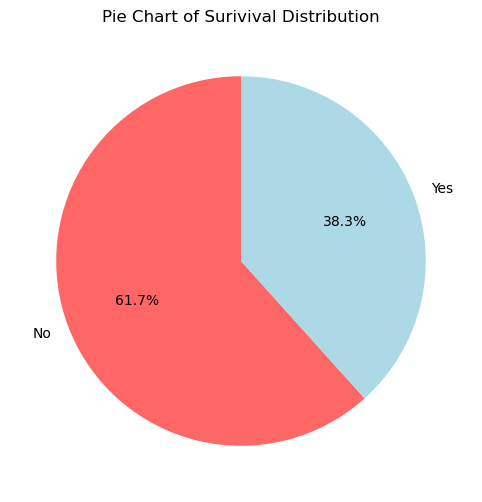

In [239]:
train_data = pd.concat([X_train, y_train], axis = 1)
survival_count = train_data['survived'].value_counts()

survival_count.plot(
    kind = 'pie',
    autopct = '%1.1f%%',
    startangle = 90,
    colors = ['#ff6666','lightblue'],
    ylabel = '',
    title = "Pie Chart of Surivival Distribution",
    figsize = (9, 6)
);

> We see that not surviving is the majority class within this data set, making up 61.7% of the training dataset.

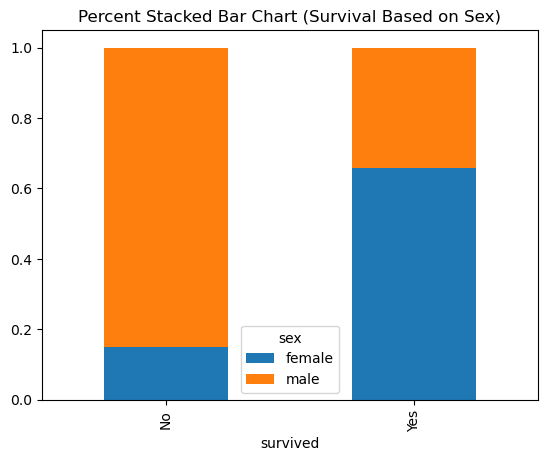

In [242]:
#create crosstab & normalize to get percentages of Survival based on Sex
cross_sex = pd.crosstab(train_data['survived'], train_data['sex'], normalize = 'index')

cross_sex.plot(
    kind = 'bar',
    stacked = True,
    title = 'Percent Stacked Bar Chart (Survival Based on Sex)'
);

> It seems sex will be a good predictor of outcome as based on the chart above, it is evident that far more women survived than men.

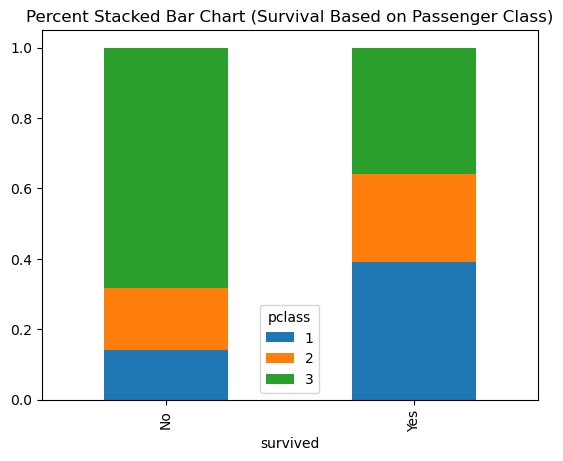

In [244]:
cross_pclass = pd.crosstab(train_data['survived'], train_data['pclass'], normalize = 'index')

cross_pclass.plot(
    kind = 'bar', 
    stacked = True,
    title = 'Percent Stacked Bar Chart (Survival Based on Passenger Class)'
);

> It seems that passenger class will be a good predictor of outcome too as we see move passengers that died (~60%) were 3rd class passengers while 1st class passengers made up most of those that survived. When it comes to why using a percent stacked bar chart may be more useful in this case comes down to what we are trying to examine. Since we are more focused on comparing the relative proportions of each category within a group rather than absolute values, a percent stacked bar chart will be much more helpful

### Question 3
Using the training data set, create a correlation matrix of all continuous variables. Visualize the matrix and describe any patterns you see. Are any predictors correlated with each other? Which ones, and in which direction?

In [264]:
import seaborn as sns

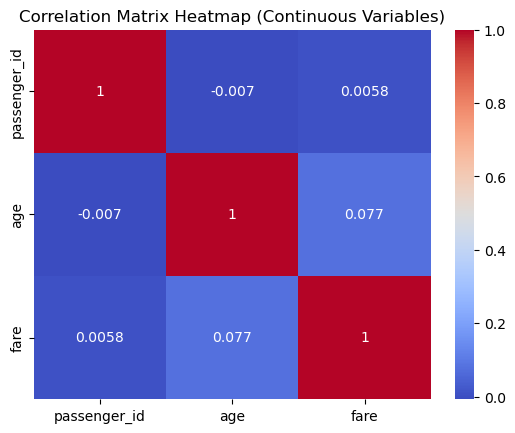

In [282]:
cont_cols = train_data.select_dtypes(include = ['float64', 'int64']).drop(columns=['parch', 'pclass', 'sib_sp'])
correlation_matrix = cont_cols.corr()

sns.heatmap(correlation_matrix, 
            annot = True, 
            cmap = 'coolwarm');
plt.title('Correlation Matrix Heatmap (Continuous Variables)');

> Based on the correlation matrix that only plots continuous variables we see a lack of correlation between any remaining features. However, we'll plot a more appropriate matrix with all quantitative features to derive more meaningful insights.

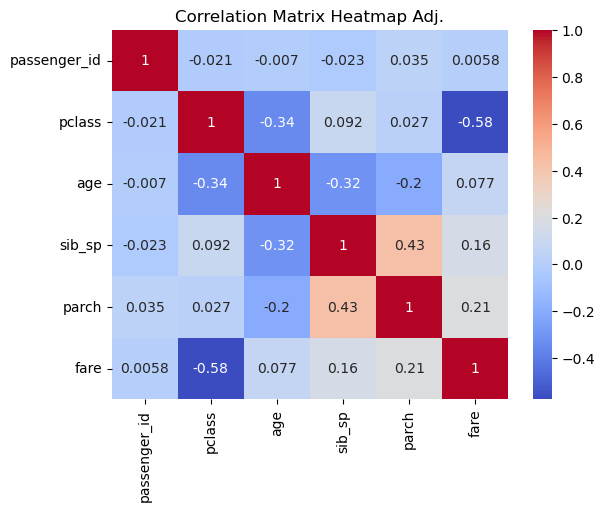

In [291]:
quantitative_cols = train_data.select_dtypes(include = ['int64', 'float64'])
correlation_matrix_2 = quantitative_cols.corr()
sns.heatmap(correlation_matrix_2,
           annot = True,
           cmap = 'coolwarm');
plt.title('Correlation Matrix Heatmap Adj.');

> Based on our new heatmap we see a moderate correlation between fare and passenger class. It is important to note that the 'negative correlation' is a result of passenger class being encoded as "1, 2, 3" for 1st Class, 2nd Class, and 3rd Class respectively and isn't appropriately factored in the order of their value. So in this case, we see fare actually increase as passenger class 'goes down' towards 1. We also see aweak, positive correlation between # of siblings/spouse and parents/children. 

### Question 4 & 5
Using the **training** data, predict the outcome variable *survived*. Include the following predictors: ticket class, sex, age, number of siblings or spouses aboard, number of parents or children aboard, and passenger fare.

Recall that there were missing values for age. To deal with this, add an imputation step. Next, **dummy** encode categorical predictors.

Specify a **logistic regression** model for classification using sklearn. Then, use fit() to apply your model to the training data.

> Because we had missing values in our age feature, we'll us a K-Nearest Neighbors imputer that employs a KNN model to predict age values based on the other features availible.

In [506]:
#KKN imputer to handle missing age values
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
train_data[['age']] = imputer.fit_transform(train_data[['age']])
#checking changes have been made
train_data.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age               0
sib_sp            0
parch             0
ticket            0
fare              0
cabin           557
embarked          1
survived          0
dtype: int64

> Now we'll pull only the features we're using for the models and dummy code categorical variables within this new training dataset. Keep in mind, we'll also need to do this on the testing data set later as well.

In [371]:
#Grabbing appropriate features and dummy coding categorical variables
model_cols = ['survived','pclass', 'sex', 'age', 'sib_sp', 'parch', 'fare']
adj_train_data = train_data[model_cols]
final_train_data = pd.get_dummies(adj_train_data, columns = ['pclass', 'sex'])
final_train_data.head()

,survived,age,sib_sp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male
258,Yes,35.0,0,0,512.3292,1,0,0,1,0
615,Yes,24.0,1,2,65.0000,0,1,0,1,0
708,Yes,22.0,0,0,151.5500,1,0,0,1,0
169,No,28.0,0,0,56.4958,0,0,1,0,1
17,Yes,30.0,0,0,13.0000,0,1,0,0,1


In [406]:
from sklearn.linear_model import LogisticRegression

X_train = final_train_data.drop('survived', axis = 1)
y_train = final_train_data['survived']

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train);

### Question 6
**Repeat Question 5**, but this time specify a linear discriminant analysis model for classification.

In [409]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train);

### Question 7
**Repeat Question 5**, but this time specify a quadratic discriminant analysis model for classification.

In [419]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train);

### Question 8 
**Repeat Question 5**, but this time specify a k-nearest neighbors model for classification using the "kknn" engine. Choose a value for k to try.

In [483]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train);

### Question 9
Now you've fit for different models to your training data.

Generate predictions using each of these 4 models and your training data. Then use the mteric of [area under the ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) to access the performance of each of the four models.

In [486]:
from sklearn.metrics import roc_auc_score, roc_curve

#Logistic Regression
log_prob = log_model.predict_proba(X_train)[:, 1]  #Probabilities for the positive class
log_auc = roc_auc_score(y_train, log_prob)
print(f'Logistic Regression AUC: {log_auc}')

#LDA
lda_prob = lda_model.predict_proba(X_train)[:, 1] 
lda_auc = roc_auc_score(y_train, lda_prob)
print(f'LDA AUC: {lda_auc}')

#QDA
qda_prob = qda_model.predict_proba(X_train)[:, 1] 
qda_auc = roc_auc_score(y_train, qda_prob)
print(f'QDA AUC: {qda_auc}')

#KNN
knn_prob = knn_model.predict_proba(X_train)[:, 1]  
knn_auc = roc_auc_score(y_train, knn_prob)
print(f'KNN AUC: {knn_auc}')

Logistic Regression AUC: 0.8447604028469633
LDA AUC: 0.8423656829123798
QDA AUC: 0.8180930686625448
KNN AUC: 0.8789873755705191


> After fitting all the models and we see solid performances all around hovering in the ~.8 range. The model that performed the best on our training data, with respect to ROC AUC score, was the K-Nearest Neighbor model with a score of .8789

### Question 10
Predict your testing data and report the AUC of each model on the testing data. Which model achieved the highest AUC on the testing data?

Using your top-performing model, create a confusion matrix and visualize it. Create a plot of its ROC curve.

How did your best model perform? Compare its training and testing AUC values. If the values differ, why do you think this is so?

In [516]:
#Combining X and Y test to adjust more predictions 
test_data = pd.concat([X_test, y_test], axis = 1)

#Applying KNN impute for missing age values
test_data[['age']] = imputer.fit_transform(test_data[['age']])

#Removing columns unused in training dataset
test_data_adj = test_data[model_cols]

#Dummy code categorical variables 
final_test_data = pd.get_dummies(test_data_adj, columns = ['pclass', 'sex'])

X_test = final_test_data.drop('survived', axis = 1)
y_test = final_test_data['survived']

In [541]:
#Deriving ROC AUC Scores

#Logistic Regression
log_pred_prob = log_model.predict_proba(X_test)[:, 1]  #Probabilities for the positive class
pred_log_auc = roc_auc_score(y_test, log_pred_prob)
print(f'Logistic Regression AUC: {pred_log_auc}')

#LDA
lda_pred_prob = lda_model.predict_proba(X_test)[:, 1] 
pred_lda_auc = roc_auc_score(y_test, lda_pred_prob)
print(f'LDA AUC: {pred_lda_auc}')

#QDA
qda_pred_prob = qda_model.predict_proba(X_test)[:, 1]
pred_qda_auc = roc_auc_score(y_test, qda_pred_prob)
print(f'QDA AUC: {pred_qda_auc}')

#KNN
knn_pred_prob = knn_model.predict_proba(X_train)[:, 1]  
pred_knn_auc = roc_auc_score(y_train, knn_prob)
print(f'KNN AUC: {knn_auc}')

Logistic Regression AUC: 0.9002635046113306
LDA AUC: 0.9021080368906456
QDA AUC: 0.8332015810276681
KNN AUC: 0.8789873755705191


> Surprisingly the best performing models were the Logistic Regression and Linear Discriminant models, being both the only models to break the .9 mark for ROC AUC score and beat their training data score. This difference in score is unusual as fitting and testing on the training data oftentimes leads to overfitting and a much better performance on the training set vs. the test set. However, due to stratified sampling, not aiming for an excessively high training score, and most importantly random variation, the following scores improved in comparison to their training counterparts. We'll create a confusion matrix for the LDA model below to further examine how well it did.

Number of 'Yes' (Survived): 72


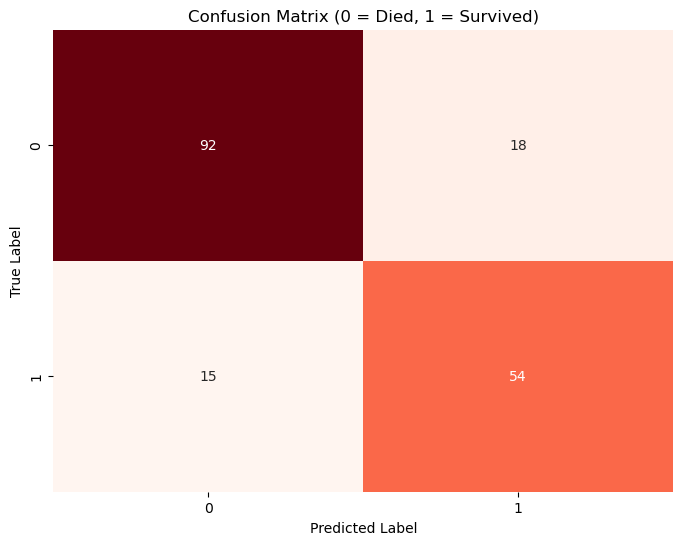

In [599]:
from sklearn.metrics import confusion_matrix, roc_curve

# Confusion Matrix
lda_pred = lda_model.predict(X_test)
cm = confusion_matrix(y_test, lda_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix (0 = Died, 1 = Survived)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label');
count_yes = np.sum(lda_pred == 'Yes')
print(f"Number of 'Yes' (Survived): {count_yes}")

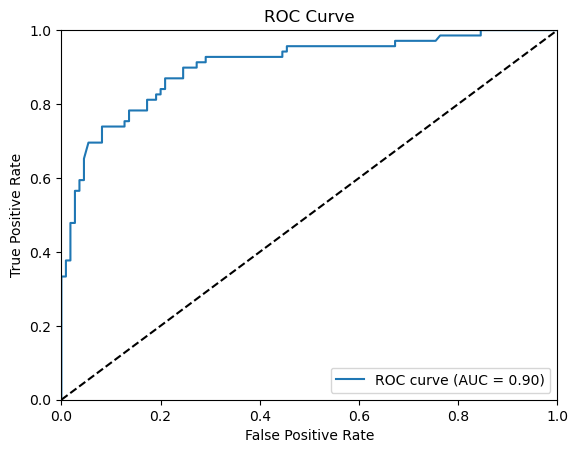

In [611]:
#Mapping the current string labels (Yes & No) to what the ROC curve function expects (0 and 1)
y_test_numeric = y_test.map({'Yes': 1, 'No': 0})

fpr, tpr, thresholds = roc_curve(y_test_numeric, lda_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test_numeric, lda_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  #diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()